In [24]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

def render(spec, rounds=10, columns=None):
    model = parse(spec)
    plt.close('all')
    results = model.run(rounds=rounds)[1:]
    df = pd.DataFrame.from_records(results, columns=columns)
    df.cumsum()
    plt.figure();
    return df.plot(figsize=(12, 4));

def dot(spec):
    "Render via graphviz."
    model = parse(spec)
    return as_dot(model)

def table(spec, rounds=10):
    "Shows first five and last five rows."
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    if rounds > 10:
        results = results[:5] + results[-5:]
    
    return HTML(model.render_html(results))

def raw_table(spec, rounds=10):
    "Exportable HTML you could embed somewhere."
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    rendered = model.render_html(results)
    return rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")

<Figure size 432x288 with 0 Axes>

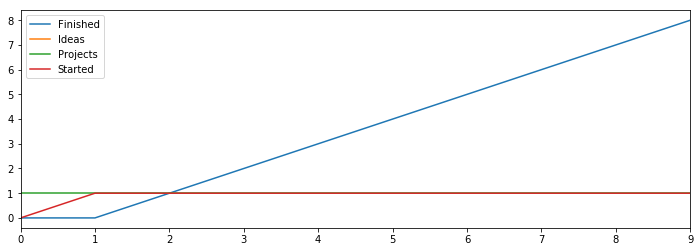

In [20]:
spec = """
[Ideas] > Projects @ 1
Projects > Started @ 1
Started > Finished @ 1
"""
render(spec);

<Figure size 432x288 with 0 Axes>

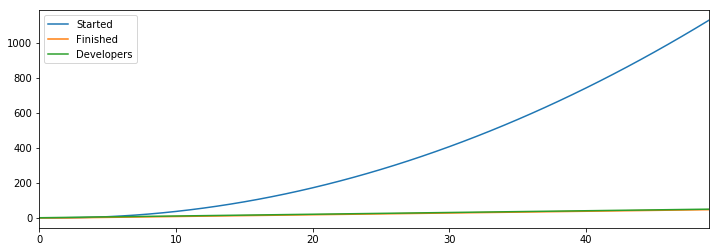

In [21]:
spec = """
[Hires] > Developers @ 1
[Ideas] > Projects   @ Developers
Projects > Started   @ Developers
Started > Finished   @ 1
"""
render(spec, rounds=50, columns=["Started", "Finished", "Developers"])

Round,Developers,Projects,Started,Finished
0,2,0,0,0
1,4,2,0,0
2,6,4,2,0
3,8,6,4,2
4,10,8,6,6
5,192,190,8918,12
6,194,192,9108,12
7,196,194,9300,12
8,198,196,9494,12
9,200,198,9690,12


<Figure size 432x288 with 0 Axes>

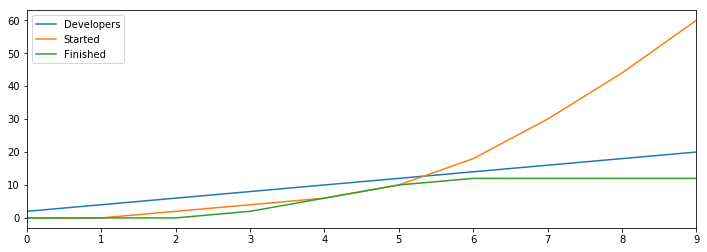

In [38]:
spec = """
[Hires] > Developers @ 2
[Ideas] > Projects   @ Developers
Projects > Started   @ Developers
Started > Finished   @ Developers - Started
"""
render(spec, rounds=10, columns=["Developers", "Started", "Finished"])
table(spec, rounds=100)

Round,Developers,Projects,Started,Finished
0,2,0,0,0
1,4,2,0,0
2,6,4,2,0
3,8,6,4,2
4,10,8,6,6
5,192,8,190,190
6,194,8,192,192
7,196,8,194,194
8,198,8,196,196
9,200,8,198,198


<Figure size 432x288 with 0 Axes>

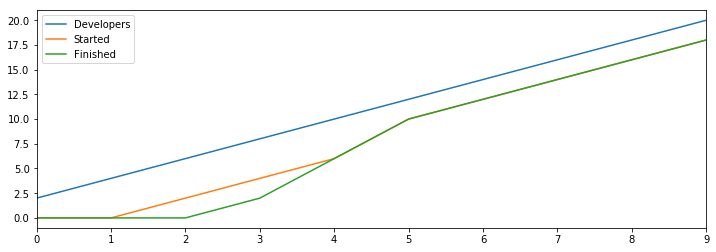

In [43]:
spec = """
[Hires] > Developers @ 2
[Ideas] > Projects   @ Developers - Started
Projects > Started   @ Developers - Started
Started > Finished   @ Developers - Started
"""
render(spec, rounds=10, columns=["Developers", "Started", "Finished"])
table(spec, rounds=100)

Round,Reprioritization,Developers,Projects,Started,Finished
0,1,2,0,0,0
1,1,4,2,0,0
2,1,6,4,2,0
3,1,8,6,4,2
4,1,10,7,7,5
5,1,192,7,190,97
6,1,194,7,192,98
7,1,196,7,194,99
8,1,198,7,196,100
9,1,200,7,198,101


<Figure size 432x288 with 0 Axes>

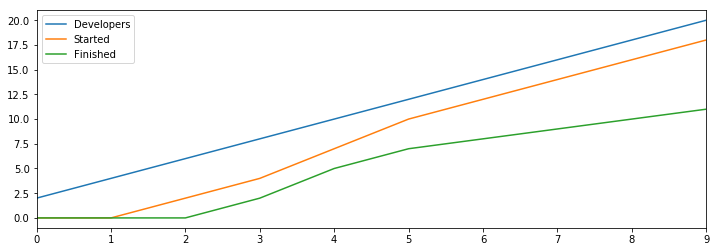

In [44]:
spec = """
Reprioritization(1)
[Hires]  > Developers @ 2
[Ideas]  > Projects   @ Developers - Started
Projects > Started    @ Developers - Started
Started  > Finished   @ Developers - Started - Reprioritization
"""
render(spec, rounds=10, columns=["Developers", "Started", "Finished"])
table(spec, rounds=100)